# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from CMEP import CMEP_Atom
from CMEP_TwoElectron import Two_Electron_Plasma
from qsps import QSP_HNC
from constants import *
# from hnc_Ng import  HNC_solver
# from qsps import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
        
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Ha_to_J = 4.359744e-18
k_B = 1.380649e-23 
m_p = 1.672621898e-27 # kg
eV_to_K = 11604.5250061598
J_to_erg = 1e7
Ha_to_erg = Ha_to_J*J_to_erg

# Function that sets up HNC QSP 

## Load TCCW Cases

In [34]:
element='Be1'

if element=='Be1':
    ni_cc = 1.24e23
    Te_eV = 100#12
    Ti_eV = Te_eV
    Z, A = 4, 9
    Zbar = 2.105
elif element=='Be2':
    ni_cc = 3.67e23
    Te_eV = 13
    Ti_eV = Te_eV
    Z, A = 4, 9
    Zbar = 2.21
elif element=='Be3':
    ni_cc = 3.67e23
    Te_eV = 2
    Ti_eV = Te_eV
    Z, A = 4, 9
    Zbar = 2.21
# elif element='Al1':
#     ni_cc = 6.03e22
#     Te_eV = 1
#     Ti_eV = 1
#     Z, A= 13,
    

ni_AU = ni_cc*1e6*aB**3

r_s_AU = QSP_HNC.rs_from_n(ni_AU)
r_c = 0
if r_c>1:
    r_c=1e-5
print("Te = {0:.3e} eV, n_i = {1:.3e} 1/cc".format(Te_eV, ni_cc))
print("Te = {0:.3e} K, ρ = {1:.3e} [g/cc] ".format(Te_eV*eV_to_K, 1e3*ni_cc*m_p*A ))
print("r_s = {0:.3f}, r_c/r_s = {1:.3f}".format(r_s_AU, r_c))

Te = 1.000e+02 eV, n_i = 1.240e+23 1/cc
Te = 1.160e+06 K, ρ = 1.867e+00 [g/cc] 
r_s = 2.351, r_c/r_s = 0.000


In [35]:
atom = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar,
             βu_options = {'add_bridge':True,'bridge':'yukawa', 'pseudopotential':False}, 
             qsp_options= {'r_c':0.0},
             hnc_options= {'kappa_multiscale':10, 'R_max':5,'N_bins':500,'oz_method':'svt'},
             hnc_solve_options={'alpha_Picard':1})
atom.run_hnc()

atom_oz = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar,
             βu_options = {'add_bridge':False,'bridge':'yukawa', 'pseudopotential':False}, 
             qsp_options= {'r_c':0.0,'which_Tij':'thermal'},
             hnc_options= {'kappa_multiscale':10, 'R_max':5,'N_bins':500,'oz_method':'standard'},
             hnc_solve_options={'alpha_Picard':1})
atom_oz.run_hnc()
atom_oz.run_onlyion_hnc()


Te_in_eV: 100.000
Ti_in_eV: 100.000
0: Initial condition Total Error: 5.712e-01
Exiting status 0, reverting to best index so far: 7
Final iter:8, Total Error: 3.245e-09
Te_in_eV: 100.000
Ti_in_eV: 100.000
0: Initial condition Total Error: 5.711e-01
Exiting status 0, reverting to best index so far: 7
Final iter:8, Total Error: 3.322e-09
0: Initial condition Total Error: 4.182e-01
Exiting status 0, reverting to best index so far: 8
Final iter:9, Total Error: 1.962e-09


In [ ]:

atom_2e = Two_Electron_Plasma(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar, Picard_max_err=1,
             βu_options = {'add_bridge':True,'bridge':'yukawa', 'pseudopotential':False}, 
             qsp_options= {'r_c':0.0,'which_Tij':'thermal'},
             hnc_options= {'kappa_multiscale':10, 'R_max':100,'N_bins':2000,'oz_method':'svt'},
             hnc_solve_options={'alpha_Picard':0.5,'iters_to_wait':10,'verbose':True,'iters_to_use':10})
atom_2e.run_hnc()


Te_in_eV: 100.000
Ti_in_eV: 100.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 9.602e-02
1: Change in c_r: 4.616e-02, HNC Error: 3.996e-02, Total Error: 3.971e-02
2: Change in c_r: 1.900e+00, HNC Error: 1.500e+01, Total Error: 9.455e-02
3: Change in c_r: 5.532e-01, HNC Error: 4.253e-02, Total Error: 1.719e-02
4: Change in c_r: 5.284e-01, HNC Error: 1.386e-01, Total Error: 1.636e-02
5: Change in c_r: 3.739e-01, HNC Error: 2.481e-02, Total Error: 6.783e-03
6: Change in c_r: 1.577e-01, HNC Error: 4.855e-02, Total Error: 7.395e-03
7: Change in c_r: 1.286e-01, HNC Error: 1.004e-01, Total Error: 1.304e-02
8: Change in c_r: 6.099e-02, HNC Error: 1.491e-02, Total Error: 3.060e-03
9: Change in c_r: 3.916e-02, HNC Error: 5.967e-02, Total Error: 1.849e-02
Starting Ng loop, using best index so far:  8
|d_n|^2 =  [16.36585318601638, 34.513717779688996, 42.30816259239105, 100.33986615036265, 141.78257023931332, 148.4

15: Change in c_r: 3.996e-01, HNC Error: inf, Total Error: 1.040e+01
|d_n|^2 =  [23774.774870712758, 39.82554089002652, 76.00105601973286, 66.63569776437089, 94.93900696057032, 16.36585318601638, 34.513717779688996, 42.30816259239105, 100.33986615036265, 141.78257023931332]
A:  [[5.66991303e+08 5.67784008e+08 5.67569992e+08 5.68205580e+08
  5.66465352e+08 5.66872790e+08 5.67043174e+08 5.68322888e+08
  5.69218141e+08]
 [5.67784008e+08 5.68578035e+08 5.68363683e+08 5.69000283e+08
  5.67257217e+08 5.67665311e+08 5.67835963e+08 5.69117788e+08
  5.70014506e+08]
 [5.67569992e+08 5.68363683e+08 5.68149425e+08 5.68785747e+08
  5.67043431e+08 5.67451348e+08 5.67621921e+08 5.68903201e+08
  5.69799516e+08]
 [5.68205580e+08 5.69000283e+08 5.68785747e+08 5.69422898e+08
  5.67678331e+08 5.68086777e+08 5.68257583e+08 5.69540505e+08
  5.70438023e+08]
 [5.66465352e+08 5.67257217e+08 5.67043431e+08 5.67678331e+08
  5.65939972e+08 5.66346971e+08 5.66517161e+08 5.67795513e+08
  5.68689766e+08]
 [5.6687279

20: Change in c_r: 1.868e-03, HNC Error: 3.008e-02, Total Error: 7.183e-03
|d_n|^2 =  [9.797947071869562, 6.417618843527073, 26.296596524946494, 2.8410636517646437, 5.401642824394657, 23774.774870712758, 39.82554089002652, 76.00105601973286, 66.63569776437089, 94.93900696057032]
A:  [[ 1.15904572e+01 -5.62509358e+01  4.27395237e+01  1.49751863e+01
  -7.48679831e+04  1.68351324e+02  2.91857281e+02  2.59932385e+02
   3.55988760e+02]
 [-5.62509358e+01  2.73024574e+02 -2.07483538e+02 -7.27106335e+01
   3.62497042e+05 -8.16873761e+02 -1.41651254e+03 -1.26183510e+03
  -1.72741489e+03]
 [ 4.27395237e+01 -2.07483538e+02  1.57838789e+02  5.53506345e+01
  -2.74467242e+05  6.19820781e+02  1.07625185e+03  9.59674571e+02
   1.31112883e+03]
 [ 1.49751863e+01 -7.27106335e+01  5.53506345e+01  1.94383607e+01
  -9.62765252e+04  2.16958991e+02  3.77083969e+02  3.36428083e+02
   4.59074383e+02]
 [-7.48679831e+04  3.62497042e+05 -2.74467242e+05 -9.62765252e+04
   5.64816599e+08 -1.08612677e+06 -1.87704193e

25: Change in c_r: 3.006e-03, HNC Error: 6.555e-03, Total Error: 1.256e-03
|d_n|^2 =  [5.000326246662029, 6.644215563257856, 7.347954458654764, 8.744396724392837, 10.119041694722446, 9.797947071869562, 6.417618843527073, 26.296596524946494, 2.8410636517646437, 5.401642824394657]
A:  [[   2.70526431    3.86417211    6.1609886     8.41336836  -24.27953972
   -18.68067915  -51.45484298   -3.62216451  -17.03879232]
 [   3.86417211    5.52202757    8.81141615   12.04086804  -34.71470094
   -26.71970773  -73.52591801   -5.19256196  -24.36264108]
 [   6.1609886     8.81141615   14.08127061   19.26613634  -55.44429721
   -42.70424502 -117.30658469   -8.33047925  -38.91049834]
 [   8.41336836   12.04086804   19.26613634   26.3891652   -75.81923864
   -58.42998353 -160.27593337  -11.43085054  -53.20407665]
 [ -24.27953972  -34.71470094  -55.44429721  -75.81923864  218.39913813
   168.17914477  462.23722708   32.78585393  153.29673415]
 [ -18.68067915  -26.71970773  -42.70424502  -58.42998353  16

30: Change in c_r: 1.939e-04, HNC Error: 4.274e-02, Total Error: 6.574e-03
|d_n|^2 =  [12.144306649976457, 12.167456726772286, 12.298854334069821, 10.58335684061764, 10.525524803445277, 5.000326246662029, 6.644215563257856, 7.347954458654764, 8.744396724392837, 10.119041694722446]
A:  [[ 1.75316393e-03  2.46628695e-02 -1.54159647e-02 -1.67431165e-02
  -1.56881529e-01 -1.17369714e-01 -1.01951031e-01 -7.35541038e-02
  -4.83284466e-02]
 [ 2.46628695e-02  6.78326286e-01  4.28642277e-01  4.20960597e-01
  -6.53957918e-01 -3.90924834e-01 -3.17059988e-01 -2.29582151e-01
  -1.95630479e-01]
 [-1.54159647e-02  4.28642277e-01  3.13012688e+00  3.22203269e+00
   1.16218068e+01  9.06007509e+00  7.92215916e+00  5.60558768e+00
   3.27901276e+00]
 [-1.67431165e-02  4.20960597e-01  3.22203269e+00  3.31730004e+00
   1.20364939e+01  9.37946357e+00  8.20062060e+00  5.80278742e+00
   3.39636586e+00]
 [-1.56881529e-01 -6.53957918e-01  1.16218068e+01  1.20364939e+01
   5.13074339e+01  3.95683785e+01  3.4511194

35: Change in c_r: 2.437e-02, HNC Error: 7.819e-03, Total Error: 1.644e-03
|d_n|^2 =  [2.1505102531842106, 8.978077922526444, 10.376403723698568, 11.517095840831225, 3.502071877104222, 12.144306649976457, 12.167456726772286, 12.298854334069821, 10.58335684061764, 10.525524803445277]
A:  [[123.32744821 138.87542882 151.1978136   11.18568096 158.24837443
  158.51823312 160.22777971 141.16664853 140.52381406]
 [138.87542882 156.38655599 170.31971798  12.78813382 178.25255067
  178.55496171 180.43786039 158.96996313 158.24590959]
 [151.1978136  170.31971798 186.58861616  17.58503558 195.09931705
  195.40091172 196.63911837 173.19411554 172.40240967]
 [ 11.18568096  12.78813382  17.58503558  13.80849719  17.71832022
   17.63471819  15.11919016  13.1560671   13.08659451]
 [158.24837443 178.25255067 195.09931705  17.71832022 204.04357504
  204.36634682 205.78953075 181.26265395 180.43456638]
 [158.51823312 178.55496171 195.40091172  17.63471819 204.36634682
  204.69087176 206.1369654  181.570

40: Change in c_r: 3.326e-02, HNC Error: 6.876e-03, Total Error: 1.400e-03
|d_n|^2 =  [1.9297112830266367, 94.17711956884298, 6.136202523271092, 11.312477960937871, 5.957607890185147, 2.1505102531842106, 8.978077922526444, 10.376403723698568, 11.517095840831225, 3.502071877104222]
A:  [[9229.53785496  769.55425985 1267.63322824 -388.63206871  385.95551715
  -680.49766297 -814.81930207 -918.92421423  298.27266755]
 [ 769.55425985   64.68800314  106.20834949  -31.87012682   32.264841
   -56.53741696  -67.68757065  -75.68826915   26.95917596]
 [1267.63322824  106.20834949  174.61252369  -52.86639699   53.09570845
   -93.27824456 -111.68184349 -125.34630548   42.88255795]
 [-388.63206871  -31.87012682  -52.86639699   16.95370912  -16.17864342
    28.90417149   34.62284389   39.80672765   -9.99151352]
 [ 385.95551715   32.264841     53.09570845  -16.17864342   16.15774036
   -28.4372021   -34.05016258  -38.32813264   12.66443476]
 [-680.49766297  -56.53741696  -93.27824456   28.90417149  -2

45: Change in c_r: 7.218e-03, HNC Error: 4.573e-02, Total Error: 9.026e-02
|d_n|^2 =  [2055.303088646641, 192.27943714053796, 44.10283509893732, 8.664196016012014, 9.389911791060017, 1.9297112830266367, 94.17711956884298, 6.136202523271092, 11.312477960937871, 5.957607890185147]
A:  [[3471313.22882339 3747313.81250718 3845433.09160698 3811900.2165318
  3832848.53851596 3654002.5839367  3817922.66683997 3808275.57403793
  3840352.49906338]
 [3747313.81250718 4045278.59026866 4151212.52360494 4115008.65226381
  4137625.45018057 3944542.92457195 4121512.63964856 4111097.38368191
  4145728.59520078]
 [3845433.09160698 4151212.52360494 4259929.71649438 4222774.38955698
  4245985.48375302 4047836.18576856 4229451.0038307  4218762.25807729
  4254302.92987933]
 [3811900.2165318  4115008.65226381 4222774.38955698 4185944.34545624
  4208952.26988529 4012534.95920626 4192561.95759866 4181966.70932796
  4217196.45621385]
 [3832848.53851596 4137625.45018057 4245985.48375302 4208952.26988529
  42320

50: Change in c_r: 1.956e-02, HNC Error: 2.865e-03, Total Error: 5.897e-04
|d_n|^2 =  [4.667650385409174, 9.304674286079626, 1.72242587115564, 8.801715198118782, 27.866354493574878, 2055.303088646641, 192.27943714053796, 44.10283509893732, 8.664196016012014, 9.389911791060017]
A:  [[ 1.94102633e+02  8.74643446e+01  1.87083374e+02  4.28893210e+02
   2.86223252e+04  2.74083199e+03  6.79015763e+02 -5.57654634e+01
   1.95435260e+02]
 [ 8.74643446e+01  3.94162568e+01  8.42995685e+01  1.92795989e+02
   1.28933374e+04  1.23465140e+03  3.05910998e+02 -2.51139923e+01
   8.80565018e+01]
 [ 1.87083374e+02  8.42995685e+01  1.80319246e+02  4.13471198e+02
   2.75867094e+04  2.64177437e+03  6.54475272e+02 -5.37573291e+01
   1.88367246e+02]
 [ 4.28893210e+02  1.92795989e+02  4.13471198e+02  1.05017199e+03
   6.46577629e+04  6.14772209e+03  1.51210572e+03 -1.24149640e+02
   4.34510168e+02]
 [ 2.86223252e+04  1.28933374e+04  2.75867094e+04  6.46577629e+04
   4.24346756e+06  4.05469385e+05  1.00282842e+0

55: Change in c_r: 4.577e-04, HNC Error: 9.782e-03, Total Error: 1.832e-03
|d_n|^2 =  [9.456746111028467, 9.436336330056498, 9.147142362719102, 8.933679532117711, 8.979028514787764, 4.667650385409174, 9.304674286079626, 1.72242587115564, 8.801715198118782, 27.866354493574878]
A:  [[4.51053457e-03 1.19146956e-02 1.68815131e-02 1.46405783e-02
  1.19894991e-01 4.39672861e-01 2.66246191e-01 4.27991260e-01
  2.03112210e-01]
 [1.19146956e-02 1.03576689e-01 1.70548107e-01 1.54626147e-01
  1.51647836e+00 5.87676468e+00 3.48408666e+00 5.71886659e+00
  1.04046450e+01]
 [1.68815131e-02 1.70548107e-01 2.83209583e-01 2.57368993e-01
  2.54461394e+00 9.88280262e+00 5.85418627e+00 9.61718243e+00
  1.80010104e+01]
 [1.46405783e-02 1.54626147e-01 2.57368993e-01 2.34416446e-01
  2.31966805e+00 9.01404130e+00 5.33743507e+00 8.77233895e+00
  1.65822658e+01]
 [1.19894991e-01 1.51647836e+00 2.54461394e+00 2.31966805e+00
  2.31535972e+01 9.01592552e+01 5.33519803e+01 8.77361226e+01
  1.69738146e+02]
 [4.39672

60: Change in c_r: 1.845e-02, HNC Error: 2.731e-01, Total Error: 2.376e-02
|d_n|^2 =  [34.27968609249791, 13.002922776941062, 12.72834564045258, 13.419243839134163, 12.267711250252562, 9.456746111028467, 9.436336330056498, 9.147142362719102, 8.933679532117711, 8.979028514787764]
A:  [[2224.60680504 2211.31251108 2246.38732593 1346.911137   2056.27204251
  2055.73453427 2042.39515871 2032.49685834 2034.43621285]
 [2211.31251108 2198.10019884 2232.9400242  1339.32466936 2043.9810612
  2043.44346604 2030.18071854 2020.33967561 2022.26871478]
 [2246.38732593 2232.9400242  2268.60189641 1355.68096372 2076.43261566
  2075.92052159 2062.48105781 2052.50473715 2054.44904503]
 [1346.911137   1339.32466936 1355.68096372  904.20254353 1244.44888568
  1243.50599668 1234.81971073 1228.44969791 1229.90155132]
 [2056.27204251 2043.9810612  2076.43261566 1244.44888568 1900.68726252
  1900.19450352 1887.8683794  1878.72149123 1880.51282153]
 [2055.73453427 2043.44346604 2075.92052159 1243.50599668 1900

65: Change in c_r: 4.988e-02, HNC Error: 2.986e+22, Total Error: 9.732e-01
|d_n|^2 =  [4435.11068942225, 22.28820092139708, 12.237201314029171, 12.19254956690057, 252.95894035005335, 34.27968609249791, 13.002922776941062, 12.72834564045258, 13.419243839134163, 12.267711250252562]
A:  [[19864278.02189102 19820914.00948877 19820662.9916668  18644492.54081395
  19615784.21431137 19824409.18341977 19823180.3262097  19826326.42195335
  19744677.64271567]
 [19820914.00948877 19777672.26337381 19777422.33264074 18603853.17376707
  19573005.64448801 19781156.84924421 19779931.04340772 19783067.28762466
  19701655.47709518]
 [19820662.9916668  19777422.33264074 19777172.41589125 18603618.3976301
  19572758.53515536 19780906.81877205 19779681.03520373 19782817.18142607
  19701407.54262462]
 [18644492.54081395 18603853.17376707 18603618.3976301  17500319.1068758
  18411460.26436111 18607123.03857198 18605971.20066276 18608917.17168406
  18532428.47259694]
 [19615784.21431137 19573005.64448801 195

70: Change in c_r: 4.575e-03, HNC Error: 3.162e-02, Total Error: 4.892e-03
|d_n|^2 =  [4.143691311137638, 6.718702684855833, 7.767550016095813, 4.620296969737848, 14.435387244854914, 4435.11068942225, 22.28820092139708, 12.237201314029171, 12.19254956690057, 252.95894035005335]
A:  [[ 7.23586111e+00  1.00468503e+01  6.01587591e-01  2.45988057e+01
  -1.18312224e+04  4.93162733e+01  2.19874283e+01  2.18140123e+01
  -6.89186321e+02]
 [ 1.00468503e+01  1.39683712e+01  9.23087204e-01  3.31042723e+01
  -1.64788318e+04  6.79861832e+01  3.06299688e+01  3.04025740e+01
  -9.59443263e+02]
 [ 6.01587591e-01  9.23087204e-01  4.81626873e-01 -2.93155966e+00
  -1.27648883e+03  1.78635386e+00  2.26118582e+00  2.30906484e+00
  -6.95950498e+01]
 [ 2.45988057e+01  3.31042723e+01 -2.93155966e+00  1.44174406e+02
  -3.71779413e+04  1.95733402e+02  6.90197939e+01  6.76646788e+01
  -2.19700810e+03]
 [-1.18312224e+04 -1.64788318e+04 -1.27648883e+03 -3.71779413e+04
   1.97054600e+07 -7.92344247e+04 -3.60723648e+

75: Change in c_r: 1.776e-02, HNC Error: 8.065e-02, Total Error: 4.285e-02
|d_n|^2 =  [123.07127770113883, 6.729501111638981, 10.669522731752522, 5.756390988504653, 9.156733189247241, 4.143691311137638, 6.718702684855833, 7.767550016095813, 4.620296969737848, 14.435387244854914]
A:  [[16177.09884956 16835.49791482 15773.13770428 16799.57607372
  16152.58738634 16490.4015449  16624.33215955 16193.10831748
  17146.06700495]
 [16835.49791482 17520.73785817 16415.00239586 17484.23287853
  16811.22198015 17162.70142431 17302.07770639 16853.51922348
  17843.27198945]
 [15773.13770428 16415.00239586 15379.46190065 16378.10548764
  15746.61399208 16076.17108541 16206.76930403 15785.85747145
  16719.24307461]
 [16799.57607372 17484.23287853 16378.10548764 17466.69691205
  16801.8200043  17150.7055825  17289.64626174 16846.58349318
  17792.07020982]
 [16152.58738634 16811.22198015 15746.61399208 16801.8200043
  16165.19812142 16499.91764923 16633.45291315 16209.24668492
  17101.67822411]
 [16490

80: Change in c_r: 1.135e-02, HNC Error: 8.148e-02, Total Error: 1.058e-02
|d_n|^2 =  [9.643875303603261, 629.1016850253117, 4.826785546493417, 87.69953476657638, 12079.689073619527, 123.07127770113883, 6.729501111638981, 10.669522731752522, 5.756390988504653, 9.156733189247241]
A:  [[ 3.83943530e+05 -3.02639779e+03 -5.98999580e+04  7.43177765e+06
   6.97988573e+04 -8.72281869e+03 -1.19110401e+04 -6.77863791e+03
  -1.15399219e+04]
 [-3.02639779e+03  2.39608964e+01  4.74342443e+02 -5.85585025e+04
  -5.46242690e+02  7.07643455e+01  9.57493923e+01  5.56275690e+01
   9.15606296e+01]
 [-5.98999580e+04  4.74342443e+02  9.45356199e+03 -1.16945522e+06
  -1.08922660e+04  1.38626160e+03  1.88364856e+03  1.08453628e+03
   1.81308026e+03]
 [ 7.43177765e+06 -5.85585025e+04 -1.16945522e+06  1.45691939e+08
   1.36707845e+06 -1.65453358e+05 -2.27738969e+05 -1.27358525e+05
  -2.23271485e+05]
 [ 6.97988573e+04 -5.46242690e+02 -1.08922660e+04  1.36707845e+06
   1.29655106e+04 -1.48496394e+03 -2.07462431e

85: Change in c_r: 2.186e-02, HNC Error: 9.166e-02, Total Error: 1.164e-02
|d_n|^2 =  [7.14139008591844, 329.42615548567244, 29.24691617565551, 60.23344808710024, 36.763593692121795, 9.643875303603261, 629.1016850253117, 4.826785546493417, 87.69953476657638, 12079.689073619527]
A:  [[ 1.04060957e+05  7.19789258e+03  1.72020689e+04  9.62839711e+03
   8.55111817e+02  2.00719388e+05 -7.21395962e+02 -3.03714029e+04
   3.87314264e+06]
 [ 7.19789258e+03  4.98034420e+02  1.19011101e+03  6.66184835e+02
   5.90853724e+01  1.38805796e+04 -5.00521348e+01 -2.10394616e+03
   2.68039035e+05]
 [ 1.72020689e+04  1.19011101e+03  2.84474118e+03  1.59188296e+03
   1.40999519e+02  3.31781000e+04 -1.19839746e+02 -5.02263332e+03
   6.39683314e+05]
 [ 9.62839711e+03  6.66184835e+02  1.59188296e+03  8.91116433e+02
   7.90744233e+01  1.85678457e+04 -6.68922882e+01 -2.81424257e+03
   3.58622197e+05]
 [ 8.55111817e+02  5.90853724e+01  1.40999519e+02  7.90744233e+01
   7.19969499e+00  1.64991123e+03 -5.65975328e+

90: Change in c_r: 1.735e-02, HNC Error: 2.527e-02, Total Error: 4.350e-03
|d_n|^2 =  [3.5244097522319526, 5.7220617972233825, 6.611026352362144, 6.2780513124658714, 3.7199983033573414, 7.14139008591844, 329.42615548567244, 29.24691617565551, 60.23344808710024, 36.763593692121795]
A:  [[ 5.45606559e+00  7.54493524e+00  6.65166688e+00 -3.39617407e-01
  -2.38789645e+01 -7.70774655e+02 -7.56477395e+01 -1.47570580e+02
  -9.31054885e+01]
 [ 7.54493524e+00  1.04524886e+01  9.24499681e+00 -3.48299024e-01
  -3.30111671e+01 -1.07042758e+03 -1.04893230e+02 -2.04707101e+02
  -1.29145934e+02]
 [ 6.65166688e+00  9.24499681e+00  8.22493535e+00 -1.12437560e-01
  -2.90729257e+01 -9.50434138e+02 -9.28817893e+01 -1.81393084e+02
  -1.14429879e+02]
 [-3.39617407e-01 -3.48299024e-01 -1.12437560e-01  9.57431447e-01
   1.63705411e+00  2.33444108e+01  3.20894008e+00  5.68392533e+00
   3.67088597e+00]
 [-2.38789645e+01 -3.30111671e+01 -2.90729257e+01  1.63705411e+00
   1.05054095e+02  3.39065716e+03  3.3256971

95: Change in c_r: 2.254e-02, HNC Error: 2.308e-02, Total Error: 4.606e-03
|d_n|^2 =  [11.646402823833197, 7.842930562474443, 7.103225625709326, 7.637841990268647, 7.418072009595021, 3.5244097522319526, 5.7220617972233825, 6.611026352362144, 6.2780513124658714, 3.7199983033573414]
A:  [[15.92028379 19.25839331 16.86152315 17.88995273 33.37140223 24.16048735
  20.69159826 22.27890682 34.26850054]
 [19.25839331 23.30404664 20.40053343 21.64846331 40.3044949  29.18834873
  25.00837994 26.93228917 41.41777683]
 [16.86152315 20.40053343 17.86169401 18.95202988 35.31373755 25.5696626
  21.90346164 23.58707325 36.27310337]
 [17.88995273 21.64846331 18.95202988 20.1113065  37.42794892 27.10449113
  23.22494778 25.01515602 38.47403295]
 [33.37140223 40.3044949  35.31373755 37.42794892 70.87597786 51.2478567
  43.73589255 46.94787479 72.06797475]
 [24.16048735 29.18834873 25.5696626  27.10449113 51.2478567  37.07580114
  31.65270664 33.97142052 52.10023619]
 [20.69159826 25.00837994 21.90346164 

100: Change in c_r: 1.232e-03, HNC Error: 5.310e-03, Total Error: 1.110e-03
|d_n|^2 =  [6.855047245721089, 6.883828297133469, 1873.8019537389405, 118.14201506076631, 11.77618714246275, 11.646402823833197, 7.842930562474443, 7.103225625709326, 7.637841990268647, 7.418072009595021]
A:  [[ 2.03697329e-03 -5.42101114e+01 -3.65562689e+00  1.56843409e-01
   1.49662754e-01  7.26063001e-03 -2.36779770e-02 -1.89557883e-03
  -1.19146964e-02]
 [-5.42101114e+01  3.53686645e+06  2.34815923e+05 -9.19509218e+03
  -8.96097940e+03 -1.81192423e+03 -3.57502959e+02 -1.40935888e+03
  -9.73019961e+02]
 [-3.65562689e+00  2.34815923e+05  1.56207001e+04 -6.15835044e+02
  -5.99951965e+02 -1.19905082e+02 -2.18393946e+01 -9.27149046e+01
  -6.32213750e+01]
 [ 1.56843409e-01 -9.19509218e+03 -6.15835044e+02  2.49023274e+01
   2.42149065e+01  4.53130894e+00  4.49860348e-01  3.39313345e+00
   2.15117026e+00]
 [ 1.49662754e-01 -8.96097940e+03 -5.99951965e+02  2.42149065e+01
   2.35560387e+01  4.47322486e+00  5.22690859

105: Change in c_r: 1.065e-03, HNC Error: 5.572e-03, Total Error: 1.137e-03
|d_n|^2 =  [6.7753306204346915, 6.787512598058307, 6.7852909390763045, 6.8043535779016215, 6.834518575364345, 6.855047245721089, 6.883828297133469, 1873.8019537389405, 118.14201506076631, 11.77618714246275]
A:  [[ 2.33738971e-04  1.74745567e-04  3.92135792e-04  7.77181719e-04
   1.21801820e-03  1.47574845e-03 -2.26475258e+01 -1.44998916e+00
   5.10569485e-02]
 [ 1.74745567e-04  1.32647910e-04  3.12949257e-04  6.24125653e-04
   9.48894664e-04  1.17967114e-03 -1.85697644e+01 -1.19896594e+00
   4.35549171e-02]
 [ 3.92135792e-04  3.12949257e-04  8.76445997e-04  1.77517194e-03
   2.38774353e-03  3.04350442e-03 -5.44562504e+01 -3.58708736e+00
   1.38685295e-01]
 [ 7.77181719e-04  6.24125653e-04  1.77517194e-03  3.60223310e-03
   4.81697475e-03  6.19755440e-03 -1.11116500e+02 -7.33310055e+00
   2.85351064e-01]
 [ 1.21801820e-03  9.48894664e-04  2.38774353e-03  4.81697475e-03
   7.27806098e-03  9.63660825e-03 -1.490535

110: Change in c_r: 8.511e-02, HNC Error: 8.549e-02, Total Error: 3.443e-02
|d_n|^2 =  [31.268757010807434, 124.9268422288564, 6.070561336534676, 6.532470745347188, 6.651585429026177, 6.7753306204346915, 6.787512598058307, 6.7852909390763045, 6.8043535779016215, 6.834518575364345]
A:  [[ 9075.41556178 -3351.06666383 -3394.74148862 -3405.93409296
  -3417.40712803 -3418.48106401 -3418.3007972  -3420.08484862
  -3422.8937933 ]
 [-3351.06666383  1380.61613598  1397.27826199  1401.57513466
   1406.06156644  1406.50800331  1406.42508107  1407.14704799
   1408.26785507]
 [-3394.74148862  1397.27826199  1414.15399579  1418.50607143
   1423.0499947   1423.5021428   1423.41816429  1424.14888961
   1425.28361985]
 [-3405.93409296  1401.57513466  1418.50607143  1422.87250881
   1427.43155298  1427.88526443  1427.8009798   1428.53394553
   1429.67228326]
 [-3417.40712803  1406.06156644  1423.0499947   1427.43155298
   1432.00680556  1432.46229819  1432.37763667  1433.11290868
   1434.25503181]
 [-3

In [ ]:
atom_2e.hnc.plot_species_convergence_g(n_slices = len(atom_2e.hnc.tot_err_list))

In [ ]:
Bredow_CHNC = read_csv("/home/zach/plasma/datasets/RDFs/Be_12eV_1.24e23cc_CHNC_Bredow.txt", delim_whitespace=True, header=0)
Bredow_DFT = read_csv("/home/zach/plasma/datasets/RDFs/Be_12eV_1.24e23cc_DFT_Bredow.txt", delim_whitespace=True, header=0)
# Bredow_CHNC = read_csv("/home/zach/plasma/datasets/RDFs/Be_13eV_3.676e23cc_CHNC_Bredow.txt", delim_whitespace=True, header=0)
# Bredow_DFT = read_csv("/home/zach/plasma/datasets/RDFs/Be_13eV_3.676e23cc_DFT_Bredow.txt", delim_whitespace=True, header=0)

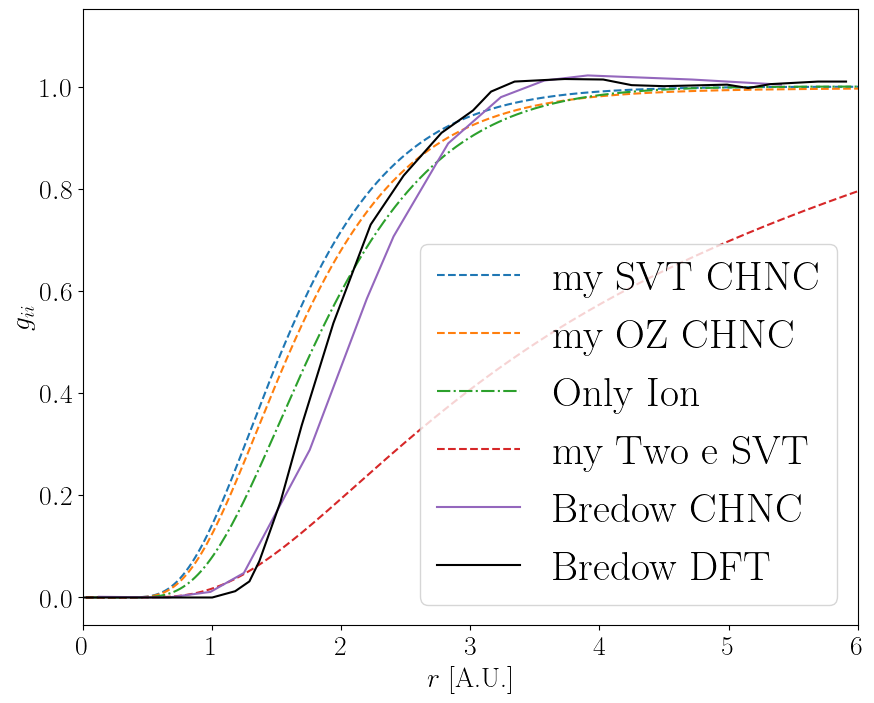

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(atom.hnc.r_array*atom.qsp.ri, atom.hnc.h_r_matrix[0,0]+1,'--', label='my SVT CHNC')
ax.plot(atom_oz.hnc.r_array*atom_oz.qsp.ri, atom_oz.hnc.h_r_matrix[0,0]+1,'--', label='my OZ CHNC')
ax.plot(atom_oz.onlyion_hnc.r_array*atom_oz.qsp.ri, atom_oz.onlyion_hnc.h_r_matrix[0,0]+1,'-.', label='Only Ion')
ax.plot(atom_2e.hnc.r_array*atom_2e.qsp.ri, atom_2e.hnc.h_r_matrix[0,0]+1,'--', label='my Two e SVT')

ax.plot(Bredow_CHNC['r[aB]'], Bredow_CHNC['gii'], label="Bredow CHNC")
ax.plot(Bredow_DFT['r[aB]'], Bredow_DFT['gii'],'k-', label="Bredow DFT")
ax.set_xlim(0,6)
ax.set_ylabel(r'$g_{ii}$',fontsize=20)
ax.set_xlabel(r'$r$ [A.U.]',fontsize=20)
ax.tick_params(labelsize=20)

ax.legend()